In [1]:
#Importing the required libraries
import pandas as pd #Access and manipulation of dataset
import matplotlib.pyplot as plt #Plotting graphs
import seaborn as sns #Also for statistical visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
data = pd.read_csv("diabetes.csv")
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

<Axes: >

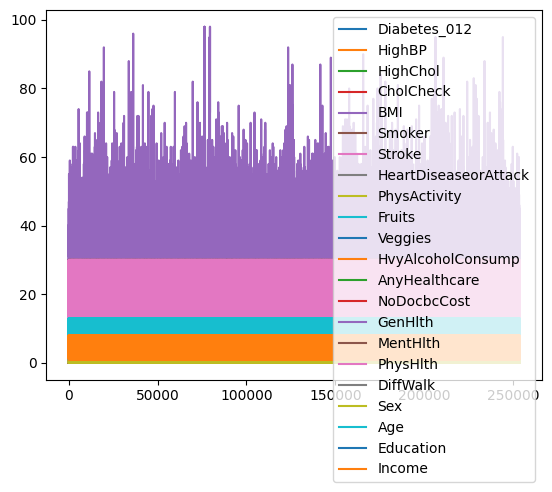

In [5]:
data.plot()

In [6]:
data.describe()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<Axes: >

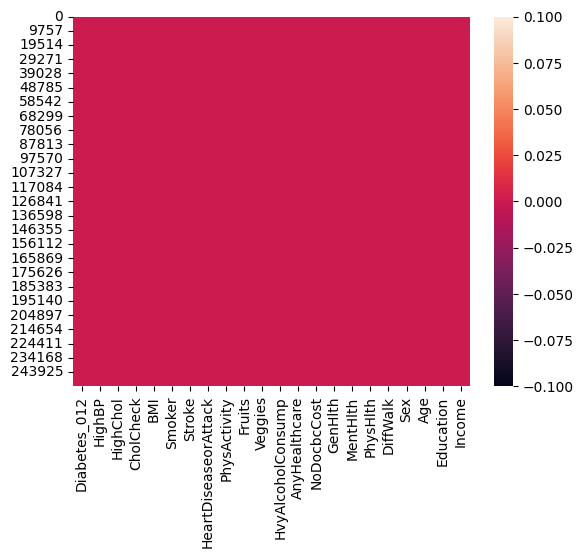

In [7]:
#Check for missing values
#We plot a heat map
sns.heatmap(data.isnull())
#There is no missing values as there is no change in color in the heatmap.

<Axes: >

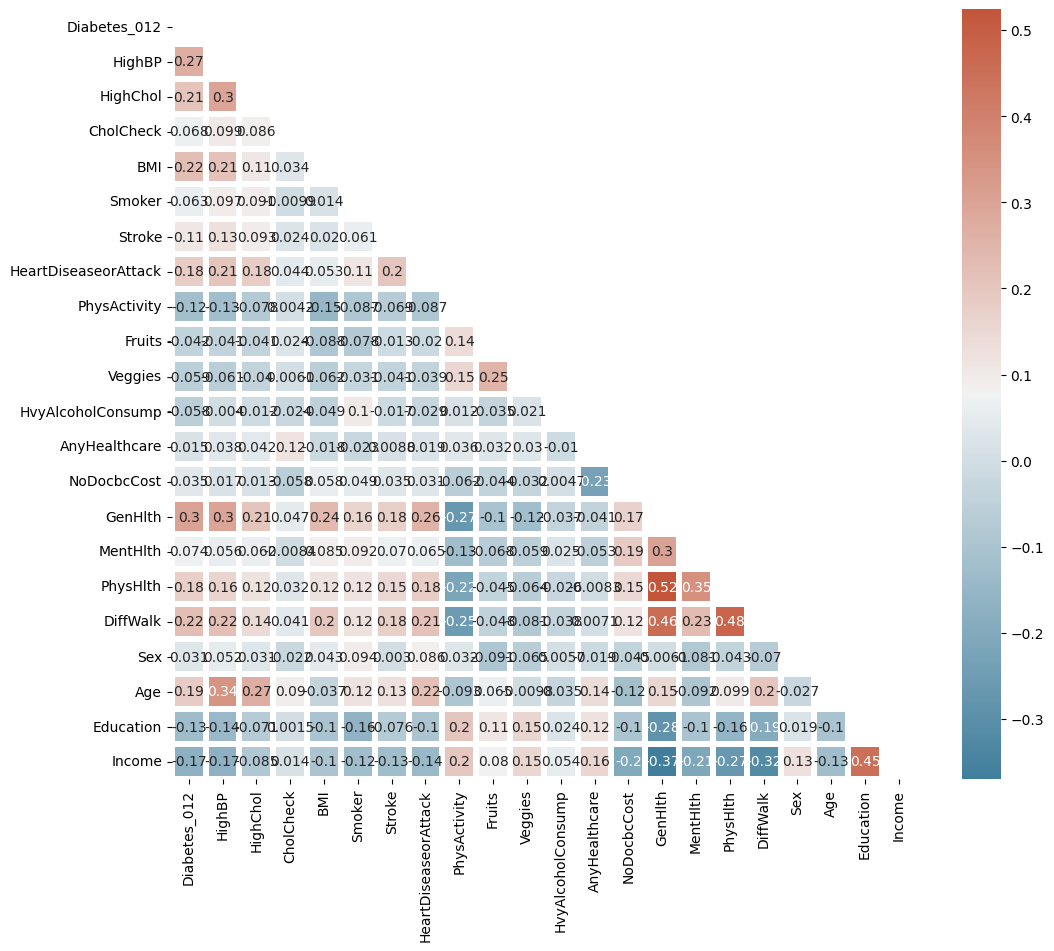

In [8]:
#Co-relation matrix, which factors impact the most
corr = data.corr()
linewidths = 4
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,linewidths=linewidths, annot=True, mask = mask, cmap=cmap)


In [4]:
data= data.dropna()
X = data.drop("Diabetes_012",axis=1)
Y = data["Diabetes_012"]
#Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Splitting data

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)
import pandas as pd

X_train_df = pd.DataFrame(X_train)
print(X_train_df.isnull().sum())




0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


In [10]:
#Training the model
#1 Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)
#Make predictions
predictions = model.predict(X_test)
#Scores
accuracy = accuracy_score(Y_test,predictions)
precision = precision_score(Y_test,predictions,average="micro")
f1 = metrics.f1_score(Y_test, predictions, average="micro", labels=np.unique(predictions), zero_division=0)
recall = recall_score(Y_test,predictions,average="micro")
print(f"Accuracy={accuracy}")
print(f"Precision={precision}")
print(f"F1 score={f1}")
print(f"Recall={recall} ")


Accuracy=0.8473864711447493
Precision=0.8473864711447493
F1 score=0.854995078006145
Recall=0.8473864711447493 


In [11]:
print(metrics.classification_report(Y_test,predictions))


              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42821
         1.0       0.00      0.00      0.00       903
         2.0       0.52      0.17      0.26      7012

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



In [12]:
y_score = model.fit(X_train, Y_train).predict_proba(X_test)
micro_roc_auc_ovr = roc_auc_score(
    Y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.96


Confusion matrix:
[[41778     0  1043]
 [  821     0    82]
 [ 5797     0  1215]]


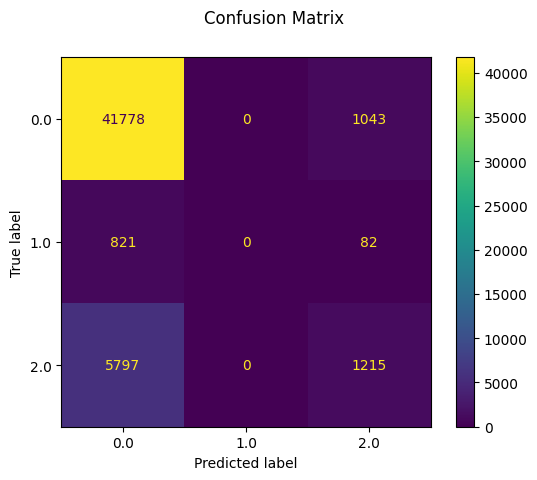

In [13]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [14]:
pred = model.predict([[1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3]])
print(int(pred))

2


In [15]:
#2 Random Forest
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

#Random Forest Classifier

RFclassifier = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state = 0 )
RFclassifier.fit(X_train, Y_train)

RF_y_pred = RFclassifier.predict(X_test)

#Scores
accuracy = accuracy_score(Y_test,RF_y_pred)
precision = precision_score(Y_test,RF_y_pred,average="micro")
f1 = metrics.f1_score(Y_test, RF_y_pred, average="micro", labels=np.unique(RF_y_pred), zero_division=0)
recall = recall_score(Y_test,RF_y_pred,average="micro")
print(f"Accuracy={accuracy}")
print(f"Precision={precision}")
print(f"F1 score={f1}")
print(f"Recall={recall} ")


Accuracy=0.836723431094292
Precision=0.836723431094292
F1 score=0.8367234310942919
Recall=0.836723431094292 


In [16]:
print(metrics.classification_report(Y_test,RF_y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     42821
         1.0       0.00      0.00      0.00       903
         2.0       0.43      0.19      0.26      7012

    accuracy                           0.84     50736
   macro avg       0.43      0.38      0.39     50736
weighted avg       0.79      0.84      0.80     50736



In [17]:
y_score = RFclassifier.fit(X_train, Y_train).predict_proba(X_test)
micro_roc_auc_ovr = roc_auc_score(
    Y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.94


Confusion matrix:
[[41115    66  1640]
 [  790     0   113]
 [ 5664    11  1337]]


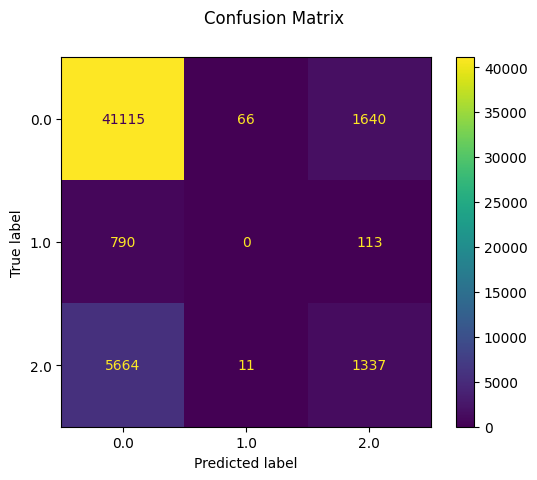

In [18]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, RF_y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [19]:
#3 Naive Bayes Classification


scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, Y_train)

NB_y_pred = NBclassifier.predict(X_test)
#Scores
accuracy = accuracy_score(Y_test,NB_y_pred)
precision = precision_score(Y_test,NB_y_pred,average="micro")
f1 = metrics.f1_score(Y_test, NB_y_pred, average="micro", labels=np.unique(NB_y_pred), zero_division=0)
recall = recall_score(Y_test,NB_y_pred,average="micro")
print(f"Accuracy={accuracy}")
print(f"Precision={precision}")
print(f"F1 score={f1}")
print(f"Recall={recall} ")

Accuracy=0.7559129612109745
Precision=0.7559129612109745
F1 score=0.7559129612109745
Recall=0.7559129612109745 


In [20]:
print(metrics.classification_report(Y_test,NB_y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85     42821
         1.0       0.04      0.02      0.03       903
         2.0       0.32      0.55      0.40      7012

    accuracy                           0.76     50736
   macro avg       0.42      0.46      0.43     50736
weighted avg       0.81      0.76      0.78     50736



In [21]:
y_score = NBclassifier.fit(X_train, Y_train).predict_proba(X_test)
micro_roc_auc_ovr = roc_auc_score(
    Y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.87


Confusion matrix:
[[34450   426  7945]
 [  516    21   366]
 [ 2992   139  3881]]


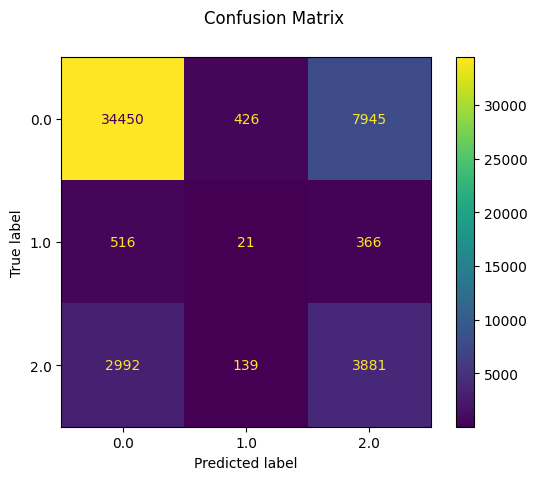

In [22]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, NB_y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [23]:
#4 KNN
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

#KNN Classifier Algorithm

KNNClassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
KNNClassifier.fit(X_train, Y_train)

KNN_y_pred = KNNClassifier.predict(X_test)


#Scores
accuracy = accuracy_score(Y_test,KNN_y_pred)
precision = precision_score(Y_test,KNN_y_pred,average="micro")
f1 = metrics.f1_score(Y_test, KNN_y_pred, average="micro", labels=np.unique(KNN_y_pred), zero_division=0)
recall = recall_score(Y_test,KNN_y_pred,average="micro")
print(f"Accuracy={accuracy}")
print(f"Precision={precision}")
print(f"F1 score={f1}")
print(f"Recall={recall} ")

Accuracy=0.8319733522548092
Precision=0.8319733522548092
F1 score=0.8319733522548092
Recall=0.8319733522548092 


In [24]:
print(metrics.classification_report(Y_test,KNN_y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     42821
         1.0       0.12      0.01      0.01       903
         2.0       0.40      0.20      0.27      7012

    accuracy                           0.83     50736
   macro avg       0.46      0.39      0.40     50736
weighted avg       0.79      0.83      0.80     50736



In [25]:
y_score = KNNClassifier.fit(X_train, Y_train).predict_proba(X_test)
micro_roc_auc_ovr = roc_auc_score(
    Y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.93


Confusion matrix:
[[40785    24  2012]
 [  783     5   115]
 [ 5580    11  1421]]


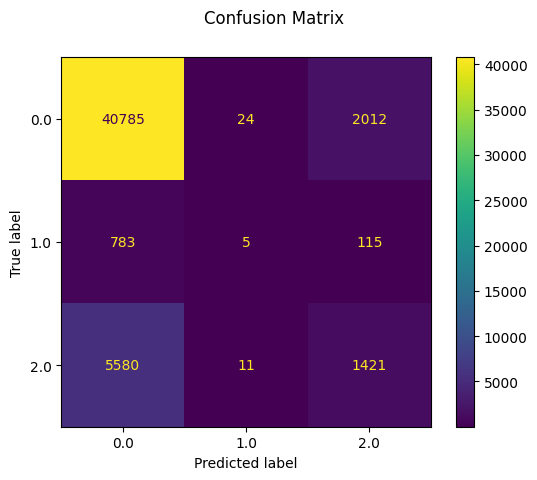

In [26]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, KNN_y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#5 SVM
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

#SVM Classifier
clf = svm.SVC(gamma=0.01,probability=True)
clf.fit(X_train, Y_train)

SVM_y_pred = clf.predict(X_test)

#Scores
accuracy = accuracy_score(Y_test,SVM_y_pred)
precision = precision_score(Y_test,SVM_y_pred,average="micro")
f1 = metrics.f1_score(Y_test, SVM_y_pred, average="micro", labels=np.unique(SVM_y_pred), zero_division=0)
recall = recall_score(Y_test,SVM_y_pred,average="micro")
print(f"Accuracy={accuracy}")
print(f"Precision={precision}")
print(f"F1 score={f1}")
print(f"Recall={recall} ")



Accuracy=0.8216424294268606       
Precision=0.8216424294268606     
F1 score=0.9020896924160602     
Recall=0.8216424294268606

In [ ]:
print(metrics.classification_report(Y_test,SVM_y_pred))


In [ ]:
y_score = clf.fit(X_train, Y_train).predict_proba(X_test)
micro_roc_auc_ovr = roc_auc_score(
    Y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score: 0.94

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, SVM_y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [9]:
#6 Decision Tree Classifier Algorithm
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)


from sklearn.tree import DecisionTreeClassifier
DTreeClassifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
DTreeClassifier.fit(X_train, Y_train)

DTree_y_pred = DTreeClassifier.predict(X_test)

#Scores
accuracy = accuracy_score(Y_test,DTree_y_pred)
precision = precision_score(Y_test,DTree_y_pred,average="micro")
f1 = metrics.f1_score(Y_test, DTree_y_pred, average="micro", labels=np.unique(DTree_y_pred), zero_division=0)
recall = recall_score(Y_test,DTree_y_pred,average="micro")
print(f"Accuracy={accuracy}")
print(f"Precision={precision}")
print(f"F1 score={f1}")
print(f"Recall={recall} ")

Accuracy=0.7679162724692526
Precision=0.7679162724692526
F1 score=0.7679162724692525
Recall=0.7679162724692526 


In [10]:
print(metrics.classification_report(Y_test,DTree_y_pred))


              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87     42684
         1.0       0.02      0.03      0.03       941
         2.0       0.30      0.32      0.31      7111

    accuracy                           0.77     50736
   macro avg       0.40      0.40      0.40     50736
weighted avg       0.78      0.77      0.77     50736



In [11]:
y_score = DTreeClassifier.fit(X_train, Y_train).predict_proba(X_test)
micro_roc_auc_ovr = roc_auc_score(
    Y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.83


Confusion matrix:
[[36681   954  5049]
 [  688    31   222]
 [ 4602   260  2249]]


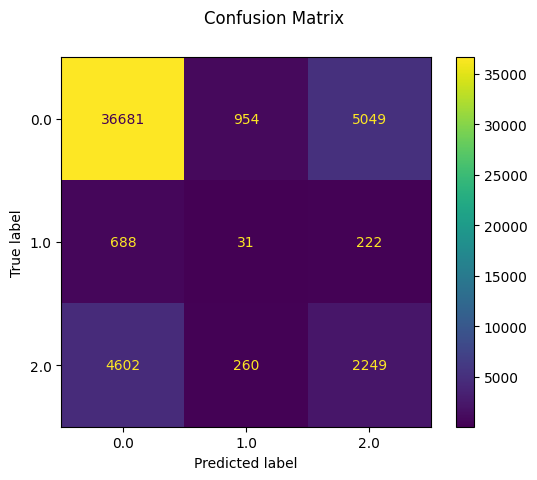

In [12]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, DTree_y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [5]:
#7 LightGBM
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, Y_train)

# Predicting the Target variable
pred = model.predict(X_test)
#Scores
accuracy = accuracy_score(Y_test,pred)
precision = precision_score(Y_test,pred,average="micro")
f1 = metrics.f1_score(Y_test, pred, average="micro", labels=np.unique(pred), zero_division=0)
recall = recall_score(Y_test,pred,average="micro")
print(f"Accuracy={accuracy}")
print(f"Precision={precision}")
print(f"F1 score={f1}")
print(f"Recall={recall} ")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] Start training from score -0.171155
[LightGBM] [Info] Start training from score -4.007304
[LightGBM] [Info] Start training from score -1.972368
Accuracy=0.8509145380006308
Precision=0.8509145380006308
F1 score=0.8509145380006307
Recall=0.8509145380006308 


In [6]:
print(metrics.classification_report(Y_test,pred))


              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42684
         1.0       0.00      0.00      0.00       941
         2.0       0.59      0.19      0.29      7111

    accuracy                           0.85     50736
   macro avg       0.48      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736



In [7]:
y_score = model.fit(X_train, Y_train).predict_proba(X_test)
micro_roc_auc_ovr = roc_auc_score(
    Y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] Start training from score -0.171155
[LightGBM] [Info] Start training from score -4.007304
[LightGBM] [Info] Start training from score -1.972368
Micro-averaged One-vs-Rest ROC AUC score:
0.96


Confusion matrix:
[[41819     1   864]
 [  866     0    75]
 [ 5758     0  1353]]


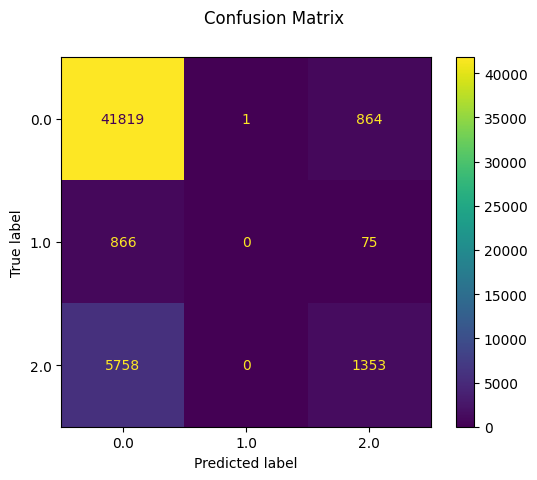

In [8]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

**SINCE LightGBM HAS THE HIGHEST ACCURACY that 82.6% with AUC Score of 96 IT CAN BE USED TO PREDICT IF THE PATIENT IS DIABETIC ,NON-DIABETIC OR PREDIABETIC.**